# <font color = 'pickle'>**Handling Long Sequence- Base Case - Truncate** </font>

# <font color = 'pickle'>**Binary Classification - Sentiment Analysis with the IMDB Dataset** </font>







## Outline
1. **Setting up the Environment**: Installing necessary libraries and setting up paths.
2. **Exploring and Understanding IMDB Dataset**: Understanding the structure and content of the dataset.

3. **Data Preprocessing**: Techniques to prepare the data for training, including handling different data splits and tokenization
4. **Training the Model**: Feeding data and adjusting weights.
5. **Inference**: Evaluate model on test set and making predictions.



# <font color = 'pickle'> **Setting up the Environment** </font>

In [1]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount("/content/drive")
    !pip install datasets transformers evaluate wandb accelerate -U -qq
    base_folder = Path("/content/drive/MyDrive/data")
else:
    base_folder = Path("/home/harpreet/Insync/google_drive_shaannoor/data")


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 25.2 MB/s eta 0:00

# <font color = 'pickle'> **Exploring and Understanding Dataset**

## <font color = 'pickle'> **Load Data set**
    


In [2]:
from datasets import load_dataset, DatasetDict

In [3]:
imdb_dataset = load_dataset("imdb")


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

## <font color = 'pickle'> **Understanding your data**

In [4]:
print(imdb_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


## <font color = 'pickle'> **Understanding the datatype of columns**


In [5]:
imdb_dataset['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

## <font color = 'pickle'> **Acess indivdual element** </font>
 The dataset behaves like an Python array or list. We can use the familiar indexing/slicing methods to access individual elements.

In [6]:
# get the first example of the dataset
imdb_dataset['train'][0]


{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [7]:
# get label of last ten examples
imdb_dataset['train']['label'][-10:]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## <font color = 'pickle'> **Exploratory Data Analysis (EDA)**

### <font color = 'pickle'> **Change dataset format to Pandas**  </font>
We will convert the datasets to Pandas DataFrames for visualization and Exploratory Data Analysis (EDA) because Pandas provides a wide range of tools and functions that simplify data manipulation, aggregation, and visualization, making it an ideal choice for these tasks

In [8]:
# this will convert all the splits into Pandas dataframe
imdb_dataset.set_format(type='pandas')


In [9]:
# get all rows from tarining split
df_train = imdb_dataset['train'][:]

In [10]:
df_train.head()


,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [11]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


### <font color = 'pickle'> **Visualize distribution of class labels** </font>
It is important to undetrstand the distribution of the class labels to check if there is any imbalance among the categories.

<Axes: >

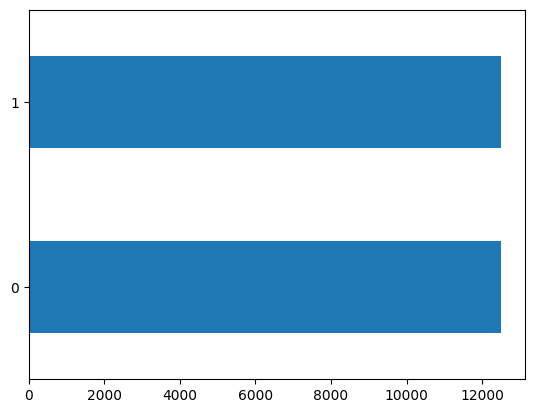

In [12]:
# check distribution of class labels in training dataset
df_train['label'].value_counts(ascending=True).plot.barh()


### <font color = 'pickle'> **Check length of the reviews** </font>


In [13]:
df_train['words_per_review'] = df_train['text'].str.split().apply(len)


In [14]:
df_train.head()


,text,label,words_per_review
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,288
1,"""I Am Curious: Yellow"" is a risible and preten...",0,214
2,If only to avoid making this type of film in t...,0,93
3,This film was probably inspired by Godard's Ma...,0,118
4,"Oh, brother...after hearing about this ridicul...",0,311


#### <font color = 'pickle'> **Plot the distribution of review length** </font>

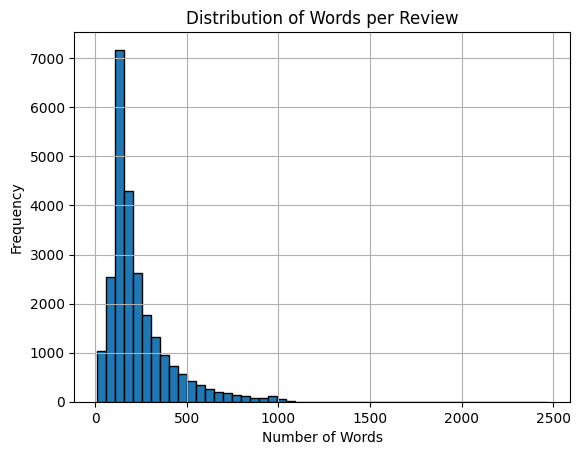

In [15]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'words_per_review' column
df_train['words_per_review'].hist(bins=50, edgecolor='black')

# Adding labels and a title for clarity
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Words per Review')

# Display the plot
plt.show()


In [16]:
# The model we are going to use has token (subwords) limit of 512.
# Let us check how many reviews has more than 500 words

count = (df_train['words_per_review'] > 400).sum()
print(f"Number of reviews with more than 400 words: {count}")


Number of reviews with more than 400 words: 3353


### <font color = 'pickle'> **Reset dataset format** </font>


In [17]:
imdb_dataset.reset_format()

In [18]:
imdb_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

# <font color = 'pickle'> **Data Pre-processing**</font>

## <font color = 'pickle'> **Filtering Larger Reviews**</font>

In [19]:
# Filter samples with more than 400 words
def filter_long_samples(example):
    return len(example['text'].split()) > 400

imdb_dataset_long = imdb_dataset.filter(filter_long_samples)

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [20]:
imdb_dataset_long

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3353
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3131
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 6642
    })
})

### <font color = 'pickle'> **Extract Splits**

In [21]:
train_split = imdb_dataset_long['train']
test_validation_dataset = imdb_dataset_long["test"]

In [22]:

train_split


Dataset({
    features: ['text', 'label'],
    num_rows: 3353
})

### <font color = 'pickle'> **Create futher subdivions of the splits** </font>

In [23]:
# Split the test set into test and validation sets
test_val_splits = imdb_dataset_long["test"].train_test_split(
    test_size=0.5, seed=42)  # 50% for validation, 50% for test

# Extract the test and validation splits
valid_split = test_val_splits["train"]
test_split = test_val_splits["test"]


In [24]:
valid_split

Dataset({
    features: ['text', 'label'],
    num_rows: 1565
})

### <font color = 'pickle'> **Create subset for experimentation** </font>

In [25]:
train_split_small = train_split.shuffle(seed=42).select(range(500))
val_split_small = valid_split.shuffle(seed=42).select(range(100))
test_split_small = test_split.shuffle(seed=42).select(range(100))


### <font color = 'pickle'> **Combine splits**</font>



In [26]:
train_val = DatasetDict(
    {"train": train_split, "valid": valid_split})
train_val_small = DatasetDict(
    {"train": train_split_small, "valid": val_split_small})


In [27]:
train_val

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3353
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1565
    })
})

In [28]:
train_val_small

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 500
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 100
    })
})

## <font color = 'pickle'> **Tokenization**</font>

###  <font color = 'pickle'> **Load pre-trained Tokenizer** </font>

In [29]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


###  <font color = 'pickle'> **Understanding pre-trained Tokenizer**
We will now understand how the tokenizer work by feeding one simple example.

In [30]:
text = ["Tokenization is the process of splitting sequence to tokens",
        "I like BUAN6482"]

In [31]:
# get the vocab size
print(f'Pretrained tokenizer vocab size {tokenizer.vocab_size}')

Pretrained tokenizer vocab size 30522


- <font color = 'indianblue'>The vocab size for the tokenizer for distilbert-base-uncased model is 30522.

In [32]:
encoded_text = tokenizer(
    text, padding=True, truncation=True, return_tensors='pt')

In [33]:
encoded_text


{'input_ids': tensor([[  101, 19204,  3989,  2003,  1996,  2832,  1997, 14541,  5537,  2000,
         19204,  2015,   102],
        [  101,  1045,  2066, 20934,  2319, 21084,  2620,  2475,   102,     0,
             0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}

In [34]:
tokens_first_sentence = tokenizer.convert_ids_to_tokens(
    encoded_text.input_ids[0])
tokens_second_sentence = tokenizer.convert_ids_to_tokens(
    encoded_text.input_ids[1])

print(tokens_first_sentence)
print(tokens_second_sentence)


['[CLS]', 'token', '##ization', 'is', 'the', 'process', 'of', 'splitting', 'sequence', 'to', 'token', '##s', '[SEP]']
['[CLS]', 'i', 'like', 'bu', '##an', '##64', '##8', '##2', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [35]:
tokenizer.convert_tokens_to_string(tokens_first_sentence)

'[CLS] tokenization is the process of splitting sequence to tokens [SEP]'

In [36]:
tokenizer.convert_tokens_to_string(tokens_second_sentence)

'[CLS] i like buan6482 [SEP] [PAD] [PAD] [PAD] [PAD]'

###  <font color = 'pickle'> **Create function for Tokenizer**

In [37]:
# Provided text
texts = [{"text": "Tokenization is the process of splitting sequence to tokens"},
         {"text": "I like BUAN6482"}]

In [38]:
def tokenize_fn(batch):
    return tokenizer(batch["text"], truncation=True)


In [39]:
# Apply the tokenize function to the text
tokenized_texts = [tokenize_fn(text) for text in texts]
tokenized_texts

[{'input_ids': [101, 19204, 3989, 2003, 1996, 2832, 1997, 14541, 5537, 2000, 19204, 2015, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 {'input_ids': [101, 1045, 2066, 20934, 2319, 21084, 2620, 2475, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}]

###  <font color = 'pickle'> **Use map function to apply tokenization to all splits**

In [40]:
tokenized_dataset = train_val.map(tokenize_fn, batched=True)
# tokenized_dataset = train_val_dataset.map(tokenize_fn, batched=True, batch_size=None)
# batch_size = None will apply the function to the whole dataset as a single batch


Map:   0%|          | 0/3353 [00:00<?, ? examples/s]

Map:   0%|          | 0/1565 [00:00<?, ? examples/s]

In [41]:
tokenized_dataset_small = train_val_small.map(tokenize_fn, batched=True)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [42]:
tokenized_dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 3353
    })
    valid: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1565
    })
})

We can see that tokenization step has added three new columns ('input_ids', 'token_type_ids', 'attention_mask') to the dataset

In [43]:
tokenized_dataset_small = tokenized_dataset_small.remove_columns(
    ['text']
)
tokenized_dataset = tokenized_dataset.remove_columns(
    ['text']
)

In [44]:
tokenized_dataset_small.set_format(type='torch')
tokenized_dataset.set_format(type='torch')

In [45]:
tokenized_dataset_small

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 500
    })
    valid: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 100
    })
})

In [46]:
tokenized_dataset_small['train'].features

{'label': ClassLabel(names=['neg', 'pos'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [47]:
print(len(tokenized_dataset_small["train"]["input_ids"][2]))
print(len(tokenized_dataset_small["train"]["input_ids"][1]))

512
512


In [48]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 3353
    })
    valid: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 1565
    })
})

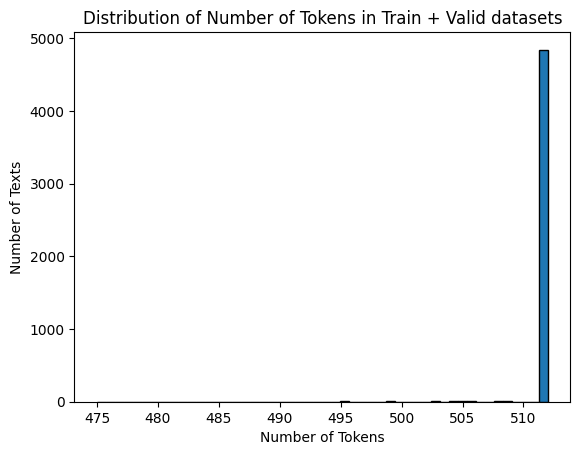

In [49]:
import matplotlib.pyplot as plt

# Assuming the data is stored in a variable named `data`
train_input_ids = tokenized_dataset['train']['input_ids']
valid_input_ids = tokenized_dataset['valid']['input_ids']

# Count the number of tokens for each entry (excluding padding tokens, which are usually 0 for BERT-like models)
train_token_counts = [sum(1 for _id in input_id if _id != 0) for input_id in train_input_ids]
valid_token_counts = [sum(1 for _id in input_id if _id != 0) for input_id in valid_input_ids]

# Combine the counts for visualization
all_token_counts = train_token_counts + valid_token_counts

# Visualize the distribution
plt.hist(all_token_counts, bins=50, edgecolor='black')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Texts')
plt.title('Distribution of Number of Tokens in Train + Valid datasets')
plt.show()


In [50]:
def max_sequence_length(input_ids_list):
    return max(sum(1 for _id in input_id if _id != 0) for input_id in input_ids_list)

train_max_length = max_sequence_length(train_input_ids)
valid_max_length = max_sequence_length(valid_input_ids)

print(f"Maximum sequence length in train set: {train_max_length}")
print(f"Maximum sequence length in valid set: {valid_max_length}")


Maximum sequence length in train set: 512
Maximum sequence length in valid set: 512


#  <font color = 'pickle'> **Model Training**

##  <font color = 'pickle'> **Model Config File**

###  <font color = 'pickle'> **Download config file of pre-trained Model**</font>



In [51]:
from transformers import AutoConfig

In [52]:
config = AutoConfig.from_pretrained(checkpoint)


In [53]:
config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.35.0",
  "vocab_size": 30522
}

###  <font color = 'pickle'> **Modify Configuration File**</font>
- We need to modify configuration fie to add ids to  label and label to ids mapping
- Adding id2label and label2id to the configuration file provides a consistent, interpretable, and user-friendly way to handle model outputs.

In [54]:
class_names = tokenized_dataset["train"].features["label"].names
class_names


['neg', 'pos']

In [55]:
id2label = {}
for id_, label_ in enumerate(class_names):
    id2label[str(id_)] = label_
id2label


{'0': 'neg', '1': 'pos'}

In [56]:
label2id = {}
for id_, label_ in enumerate(class_names):
    label2id[label_] = id_
label2id


{'neg': 0, 'pos': 1}

In [57]:
config.id2label = id2label
config.label2id = label2id


In [58]:
config


DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "neg",
    "1": "pos"
  },
  "initializer_range": 0.02,
  "label2id": {
    "neg": 0,
    "pos": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.35.0",
  "vocab_size": 30522
}

##  <font color = 'pickle'> **Download pre-trained model**

In [59]:
from transformers import AutoModelForSequenceClassification


In [60]:
AutoModelForSequenceClassification.from_pretrained??

In [61]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, config=config)  # We are using the same checkpiont as we have used for tokenizer


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## <font color = 'pickle'> **Model Input/Collate Function** </font>

In [62]:
from transformers import DataCollatorWithPadding

In [63]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [64]:
features = [tokenized_dataset["train"][i] for i in range(2)]

In [65]:
features

[{'label': tensor(0),
  'input_ids': tensor([  101,  2040,  2024,  2122,  1000,  2027,  1000,  1011,  1996,  5889,
           1029,  1996, 16587,  1029,  5121,  2481,  1005,  1056,  2022,  1996,
           4378,  1011,  2023,  2003,  2426,  1996,  2087,  2250,  1011, 23893,
           2098,  5453,  1999,  4598,  1012,  2009,  1005,  1055,  1996,  2785,
           1997,  3185,  2008,  3504,  2066,  2009,  2001,  1037,  2843,  1997,
           4569,  2000,  5607,  2205,  2172,  4569,  1010,  6343,  2003,  2893,
           2151,  5025,  2147,  2589,  1010,  1998,  2008,  2471,  2467,  3084,
           2005,  1037,  3185,  2008,  1005,  1055,  2053,  4569,  2000,  3422,
           1012,  1026,  7987,  1013,  1028,  1026,  7987,  1013,  1028, 23168,
           2123,  2015,  7877,  2061,  2004,  2000,  8691,  2188,  2010,  2839,
           1005,  1055,  3570,  2004,  1037,  4066,  1997,  2079,  9397, 23115,
          25121,  1997,  1996,  2022, 13102, 22471, 18630,  2094, 22132,  7847,
     

In [66]:
model_input = data_collator(features)
model_input.keys()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


dict_keys(['input_ids', 'attention_mask', 'labels'])

In [67]:
print(model_input.input_ids[0][0:10])
print(model_input.input_ids[0][-20:])
print(model_input.input_ids[1][0:10])
print(model_input.input_ids[1][-20:])

tensor([ 101, 2040, 2024, 2122, 1000, 2027, 1000, 1011, 1996, 5889])
tensor([ 9984,  2358,  8609,  6528,  1010,  2023,  3185,  2038,  1037,  2569,
         2173,  1999,  1996,  2540,  1997,  2720,  1012, 22132,  7847,   102])
tensor([ 101, 1045, 2031, 2023, 2143, 2041, 1997, 1996, 3075, 2157])
tensor([ 2130,  2043,  2016,  2001,  2919,  1012, 22004,  2987,  1005,  1056,
         2202,  2009,  5667,  2012,  2035,  1010,  2481,  1005,  1056,   102])


In [68]:
print(model_input.attention_mask[0][-20:])
print(model_input.attention_mask[1][-20:])

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [69]:
print(tokenizer.convert_ids_to_tokens(model_input.input_ids[0][0:10]))

['[CLS]', 'who', 'are', 'these', '"', 'they', '"', '-', 'the', 'actors']


In [70]:
print(tokenizer.convert_ids_to_tokens(model_input.input_ids[0][-10:]))

['place', 'in', 'the', 'heart', 'of', 'mr', '.', 'bog', '##dan', '[SEP]']


In [71]:
print(tokenizer.convert_ids_to_tokens(model_input.input_ids[1][0:10]))

['[CLS]', 'i', 'have', 'this', 'film', 'out', 'of', 'the', 'library', 'right']


In [72]:
print(tokenizer.convert_ids_to_tokens(model_input.input_ids[1][-10:]))

['take', 'it', 'seriously', 'at', 'all', ',', 'couldn', "'", 't', '[SEP]']


##  <font color = 'pickle'> **Understanding Model Output**

In [73]:
# model output
model=model.to(device=0)
model_input= model_input.to(device=0)
model.train()
model_output = model(**model_input)

In [74]:
# keys in model output
model_output.keys()

odict_keys(['loss', 'logits'])

In [75]:
# let us look at logits
model_output.logits


tensor([[ 0.1333, -0.0867],
        [ 0.1989, -0.1223]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [76]:
model_output.loss

tensor(0.5673, device='cuda:0', grad_fn=<NllLossBackward0>)

##  <font color = 'pickle'> **Evaluation metric(s)** </font>

### <font color = 'pickle'> **Function to compute metric** </font>

In [77]:
import evaluate
import numpy as np

In [78]:
def compute_metrics(eval_pred):
    combined_metrics = evaluate.combine([evaluate.load("accuracy"),
                                        evaluate.load("f1", average="macro")])

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    evaluations = combined_metrics.compute(
        predictions=predictions, references=labels)
    return evaluations


## <font color = 'pickle'> **Set up Logger for experiments**</font>

In [79]:
import wandb
# setup wandb
wandb.login()  # you will need to craete wandb account first
# Set project name for logging
%env WANDB_PROJECT = nlp_course_fall_2023-sentiment-analysis-lomg-seq

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


env: WANDB_PROJECT=nlp_course_fall_2023-sentiment-analysis-lomg-seq


## <font color = 'pickle'> **Hyperparameters and Checkpointing**</font>

In [80]:
from transformers import TrainingArguments

# Define the directory where model checkpoints will be saved
model_folder = base_folder / "models"/"nlp_fall_2023/imdb/long"
# Create the directory if it doesn't exist
model_folder.mkdir(exist_ok=True, parents=True)

# Configure training parameters
training_args = TrainingArguments(
    # Training-specific configurations
    num_train_epochs=1,  # Total number of training epochs
    # Number of samples per training batch for each device
    per_device_train_batch_size=16,
    # Number of samples per evaluation batch for each device
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=1,
    weight_decay=0.01,  # Apply L2 regularization to prevent overfitting
    learning_rate=2e-5,  # Step size for the optimizer during training
    optim='adamw_torch',  # Optimizer,
    fp16= True, # Use mixed precision training

    # Checkpoint saving and model evaluation settings
    output_dir=str(model_folder),  # Directory to save model checkpoints
    evaluation_strategy='steps',  # Evaluate model at specified step intervals
    eval_steps=20,  # Perform evaluation every 10 training steps
    save_strategy="steps",  # Save model checkpoint at specified step intervals
    save_steps=20,  # Save a model checkpoint every 10 training steps
    load_best_model_at_end=True,  # Reload the best model at the end of training
    save_total_limit=2,  # Retain only the best and the most recent model checkpoints
    # Use 'accuracy' as the metric to determine the best model
    metric_for_best_model="accuracy",
    greater_is_better=True,  # A model is 'better' if its accuracy is higher


    # Experiment logging configurations (commented out in this example)
    logging_strategy='steps',
    logging_steps=20,
    report_to='wandb',  # Log metrics and results to Weights & Biases platform
    run_name='imdb_long_seq_trunc',  # Experiment name for Weights & Biases
)


##  <font color = 'pickle'> **Initialize Trainer**</font>

In [81]:
from transformers import Trainer
# initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["valid"],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)


##  <font color = 'pickle'> **Start Training**

In [82]:
trainer.data_collator

DataCollatorWithPadding(tokenizer=DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}, padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='pt')

In [83]:
trainer.train()  # start training


wandb: Currently logged in as: hsingh-utd. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Accuracy,F1
20,0.675800,0.659376,0.555911,0.695576
40,0.638000,0.569758,0.778914,0.762363
60,0.539300,0.461374,0.817891,0.827168
80,0.482700,0.412915,0.828115,0.834053
100,0.357400,0.380248,0.842173,0.845528
120,0.380700,0.374291,0.838339,0.842759
140,0.409600,0.379141,0.835783,0.829689
160,0.408100,0.362527,0.844089,0.847309
180,0.303900,0.363893,0.840895,0.850987
200,0.365900,0.359921,0.849201,0.857488


TrainOutput(global_step=210, training_loss=0.44952606246584936, metrics={'train_runtime': 111.3242, 'train_samples_per_second': 30.119, 'train_steps_per_second': 1.886, 'total_flos': 444163187693568.0, 'train_loss': 0.44952606246584936, 'epoch': 1.0})

## <font color = 'pickle'> **Evaluation**


### <font color = 'pickle'> **Check performance on validation set**</font>


In [84]:
trainer.evaluate(tokenized_dataset["valid"])


{'eval_loss': 0.35992056131362915,
 'eval_accuracy': 0.8492012779552716,
 'eval_f1': 0.8574879227053139,
 'eval_runtime': 5.9473,
 'eval_samples_per_second': 263.144,
 'eval_steps_per_second': 16.478,
 'epoch': 1.0}

###  <font color = 'pickle'> **Check Confusion Matrix**</font>

In [85]:
valid_output = trainer.predict(tokenized_dataset_small["valid"])

In [86]:
valid_output._fields

('predictions', 'label_ids', 'metrics')

In [87]:
# check shape of predictions and labels
print(valid_output.predictions.shape)
print(valid_output.label_ids.shape)


(100, 2)
(100,)


In [88]:
import numpy as np
valid_preds = np.argmax(valid_output.predictions, axis=1)
valid_labels = np.array(valid_output.label_ids)


In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


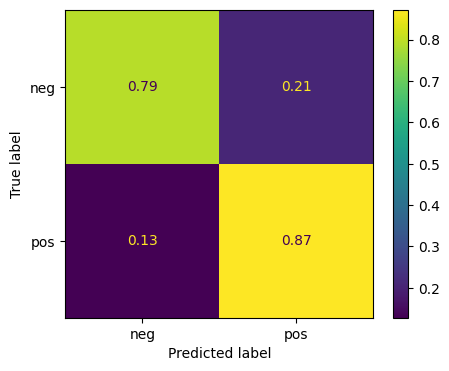

In [90]:
fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(
    y_true=valid_labels,
    y_pred=valid_preds,
    ax=ax,
    normalize="true",
    display_labels=['neg', 'pos'],
)


In [91]:
# log the Confusion Matrix to Wandb
wandb.log({"conf_mat": wandb.plot.confusion_matrix(
    preds=valid_preds, y_true=valid_labels,
    class_names=['neg', 'pos'])})


In [92]:
wandb.finish()


eval/accuracy,▁▆▇▇███████
eval/f1,▁▄▇▇▇▇▇████
eval/loss,█▆▃▂▁▁▁▁▁▁▁
eval/runtime,█▄▄▄▃▁▁▁▁▄▂
eval/samples_per_second,▁▄▄▄▅▇███▄▇
eval/steps_per_second,▁▄▄▄▅▇███▄▇
train/epoch,▁▁▂▂▂▂▃▃▄▄▅▅▅▅▆▆▇▇████
train/global_step,▁▁▂▂▂▂▃▃▄▄▅▅▅▅▆▆▇▇█████
train/learning_rate,█▇▆▆▅▄▃▃▂▁
train/loss,█▇▅▄▂▂▃▃▁▂
train/total_flos,▁


### <font color = 'pickle'> **Check the best saved model**</font>


In [93]:
# After training, let us check the best checkpoint
# We need this for Predioctions and Evaluations
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split('-')[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")


The best model was saved at step 200.


#  <font color = 'pickle'> **Inference**

## <font color = 'pickle'> **Create pipelne for inference**

In [94]:
from transformers import pipeline


In [96]:
path = 'checkpoint-' + str(best_model_checkpoint_step)
checkpoint = str(model_folder/path)
custom_pipeline = pipeline(
    task="text-classification",
    model=checkpoint,
    tokenizer=checkpoint,
    device=0)


## <font color = 'pickle'> **Test Set Evaluation**


In [97]:
from evaluate import evaluator


In [98]:
test_split


Dataset({
    features: ['text', 'label'],
    num_rows: 1566
})

In [99]:
task_evaluator = evaluator("text-classification")


In [100]:
model.config.label2id


{'neg': 0, 'pos': 1}

In [101]:
eval_results = task_evaluator.compute(
    model_or_pipeline=custom_pipeline,
    data=test_split,
    metric=evaluate.combine(["accuracy", "recall", "precision", "f1"]),
    label_mapping={'neg': 0, 'pos': 1},
    device=0
)
eval_results


{'accuracy': 0.8716475095785441,
 'recall': 0.9030303030303031,
 'precision': 0.8602771362586605,
 'f1': 0.8811354228267297,
 'total_time_in_seconds': 15.169598984000004,
 'samples_per_second': 103.23278826630316,
 'latency_in_seconds': 0.009686844817369096}

In [102]:
import pandas as pd
pd.DataFrame([eval_results])


,accuracy,recall,precision,f1,total_time_in_seconds,samples_per_second,latency_in_seconds
0,0.871648,0.90303,0.860277,0.881135,15.169599,103.232788,0.009687


##  <font color = 'pickle'> **Prediction for individual or small list of examples**

In [103]:
sample = test_split_small['text'][0]
preds = custom_pipeline(sample, truncation = True)
preds


[{'label': 'neg', 'score': 0.890131413936615}]

In [104]:
sample = test_split_small['text'][11]
len(sample.split())


406

In [105]:
preds = custom_pipeline(sample)
preds


[{'label': 'pos', 'score': 0.9305476546287537}]

## <font color = 'pickle'> **Prediction for large dataset**

In [111]:
predictions = custom_pipeline(test_split['text'], truncation=True, batch_size = 16)


In [112]:
predictions


[{'label': 'pos', 'score': 0.9437190294265747},
 {'label': 'neg', 'score': 0.8255785703659058},
 {'label': 'neg', 'score': 0.9266245365142822},
 {'label': 'pos', 'score': 0.9505204558372498},
 {'label': 'pos', 'score': 0.9382944107055664},
 {'label': 'pos', 'score': 0.5732206702232361},
 {'label': 'pos', 'score': 0.936301589012146},
 {'label': 'pos', 'score': 0.7188649773597717},
 {'label': 'pos', 'score': 0.9390888214111328},
 {'label': 'pos', 'score': 0.9207972884178162},
 {'label': 'pos', 'score': 0.8687114715576172},
 {'label': 'neg', 'score': 0.6155520677566528},
 {'label': 'neg', 'score': 0.9352563619613647},
 {'label': 'pos', 'score': 0.9543759822845459},
 {'label': 'pos', 'score': 0.9542037844657898},
 {'label': 'neg', 'score': 0.5328177213668823},
 {'label': 'pos', 'score': 0.8325712084770203},
 {'label': 'neg', 'score': 0.7741236090660095},
 {'label': 'pos', 'score': 0.8751699328422546},
 {'label': 'neg', 'score': 0.9301263689994812},
 {'label': 'pos', 'score': 0.812681317329